In [171]:
# Imports
import pandas as pd
import geopandas as gpd
#import datetime
from datetime import date
import numpy as np

In [267]:
locust_gdf = gpd.read_file("git/Locust-Covid19/my_package/data/input/Adult_Master.shp")
shp0_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_0.shp")
shp0_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_0.shp")
shp0_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_0.shp")
shp0_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_0.shp")

shp1_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_1.shp")
shp1_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_1.shp")
shp1_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_1.shp")
shp1_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_1.shp")

shp2_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_2.shp")
shp2_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_2.shp")
shp2_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_2.shp")
shp2_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_2.shp")

gdf_countries_list = [shp0_Kenya, shp0_Ethiopia, shp0_Somalia, shp0_Uganda]
countries = gpd.GeoDataFrame(pd.concat(gdf_countries_list, ignore_index=True))
shapefile_table = gpd.read_file("git/Locust-Covid19/my_package/data/output/shapefile_table.shp")

district_level = [shp2_Kenya, shp2_Ethiopia, shp2_Somalia, shp2_Uganda]
gdf_districts = gpd.GeoDataFrame(pd.concat(district_level, ignore_index=True))
gdf_districts.crs = {"init": "epsg:4326"}

In [268]:
print(locust_gdf.head())

   OBJECTID   STARTDATE TmSTARTDAT  FINISHDATE TmFINISHDA EXACTDATE PARTMONTH  \
0         1  1985-10-03      12:00  1985-10-03      12:00        No     Early   
1         2  1985-10-04      12:00  1985-10-04      12:00        No     Early   
2         3  1985-11-15      12:00  1985-11-15      12:00        No        NA   
3         4  1985-12-30      12:00  1985-12-30      12:00        No      Late   
4         5  1985-12-30      12:00  1985-12-30      12:00        No      Late   

          LOCNAME   AREAHA LOCRELIAB  ... CTLARTREA  CTLARTREAU CTLAPPHAND  \
0            None      0.0     Exact  ...       0.0        None        0.0   
1            None      0.0     Exact  ...       0.0        None        0.0   
2           Tokar  22000.0     Exact  ...       0.0        None        0.0   
3  Khor Hambokeib  60000.0     Exact  ...       0.0        None        0.0   
4  Khor Hambokeib  60000.0     Exact  ...       0.0        None        0.0   

  CTLAPPVEHI  CTLAPPAIR  CTLAPPMECH  CTLAPPU

In [251]:
print(locust_gdf.columns)

Index(['OBJECTID', 'STARTDATE', 'TmSTARTDAT', 'FINISHDATE', 'TmFINISHDA',
       'EXACTDATE', 'PARTMONTH', 'LOCNAME', 'AREAHA', 'LOCRELIAB',
       ...
       'CTLARTREA', 'CTLARTREAU', 'CTLAPPHAND', 'CTLAPPVEHI', 'CTLAPPAIR',
       'CTLAPPMECH', 'CTLAPPUNK', 'CTLESTKILL', 'CAT', 'geometry'],
      dtype='object', length=151)


In [269]:
# Filter dates
#Transform column to datetime
locust_gdf['STARTDATE'] = pd.to_datetime(locust_gdf['STARTDATE'])

# Filter date
locust_gdf_filtered = locust_gdf[(locust_gdf['STARTDATE']>datetime.date(2000,1,1)) & (locust_gdf['STARTDATE']<datetime.date.today())]

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [270]:
locust_gdf_filtered.head()

,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,AREAHA,LOCRELIAB,...,CTLARTREA,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT,geometry
16689,16690,2000-01-02,00:00,2000-01-02,00:00,Yes,NA,None,26.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (-15.42944 20.58361 0.00000)
16690,16691,2000-01-03,00:00,2000-01-03,00:00,Yes,NA,None,10.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (-15.44111 20.61778 0.00000)
16691,16692,2000-01-03,00:00,2000-01-03,00:00,Yes,NA,None,12.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (-15.41861 20.58417 0.00000)
16692,16693,2000-01-04,00:00,2000-01-04,00:00,Yes,NA,None,8.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (-15.43889 20.58611 0.00000)
16693,16694,2000-01-05,00:00,2000-01-05,00:00,Yes,NA,None,6.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (-15.45083 20.58917 0.00000)


### Filter countries

In [271]:
# Filter countries
selected_countries = ['SO', 'KE', 'ET', 'UG']
locust_gdf_filtered[locust_gdf_filtered.COUNTRYID.isin(selected_countries)]

,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,AREAHA,LOCRELIAB,...,CTLARTREA,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT,geometry
47042,47043,2009-07-30,12:00,2009-07-30,12:00,No,Late,Kobo,1500.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (39.69000 12.17972 0.00000)
48601,48602,2009-06-14,00:00,2009-06-14,00:00,Yes,NA,None,100.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (38.46667 11.73333 0.00000)
48602,48603,2009-06-16,00:00,2009-06-16,00:00,Yes,NA,None,0.0,Approximate,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (37.73333 11.61667 0.00000)
49002,49003,2009-10-15,12:00,2009-10-15,12:00,No,Middle,Chereka,80.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (38.73889 11.58694 0.00000)
49486,49487,2009-10-15,12:00,2009-10-15,12:00,No,Middle,Bego Chereka,80.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (38.73889 11.58694 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106893,109148,2020-06-08,00:00,2020-06-08,00:00,No,Early,dhagaxbur kabale bul,400.0,Exact,...,400.0,ha,0.0,0.0,0.0,0.0,1.0,0.0,Adult,POINT Z (43.55889 8.22250 0.00000)
106894,109149,2020-06-04,00:00,2020-06-04,00:00,No,Early,Somali,1.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (42.29361 8.13778 0.00000)
106901,109156,2020-06-04,00:00,2020-06-04,00:00,No,Early,Somali Region,60.0,Exact,...,60.0,ha,0.0,0.0,0.0,0.0,1.0,0.0,Adult,POINT Z (42.27972 7.08528 0.00000)
106930,109185,2020-06-09,13:13,2020-06-09,13:13,No,Early,Bagi-balaqey,2.0,Exact,...,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,Adult,POINT Z (46.82194 6.44083 0.00000)


### Filter columns
- factID
- measureID
- dateID
- locationID
- value


In [272]:
locust_gdf_filtered = locust_gdf_filtered[['OBJECTID', 'STARTDATE', 'LOCNAME', 'AREAHA', 'LOCRELIAB', 'COUNTRYID', 'LOCUSTID', 'REPORTID', 'ACOMMENT', 'LOCPRESENT', 'geometry']]
locust_gdf_filtered.shape

(90376, 11)

In [273]:
locust_gdf_filtered.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,geometry
16689,16690,2000-01-02,None,26.0,Exact,None,15939.0,MAU00-01,None,1.0,POINT Z (-15.42944 20.58361 0.00000)
16690,16691,2000-01-03,None,10.0,Exact,None,15950.0,MAU00-01,None,1.0,POINT Z (-15.44111 20.61778 0.00000)
16691,16692,2000-01-03,None,12.0,Exact,None,15953.0,MAU00-01,None,1.0,POINT Z (-15.41861 20.58417 0.00000)
16692,16693,2000-01-04,None,8.0,Exact,None,15957.0,MAU00-01,None,1.0,POINT Z (-15.43889 20.58611 0.00000)
16693,16694,2000-01-05,None,6.0,Exact,None,15964.0,MAU00-01,None,1.0,POINT Z (-15.45083 20.58917 0.00000)


In [257]:
# TODO Filter: Only include adult swarms

### Buffer

In [296]:
cpr_gdf = locust_gdf_filtered.to_crs({'init': 'epsg:32636'})  
buffer_length_in_meters = (25 * 1000)
cpr_gdf['geometry'] = cpr_gdf.geometry.buffer(buffer_length_in_meters)
cpr_gdf['area_m'] = cpr_gdf.geometry.area

# Change again system to calculate in degrees
cpr_gdf= cpr_gdf.to_crs({'init': 'epsg:4326'})  
cpr_gdf['area_d'] = cpr_gdf.geometry.area
cpr_gdf.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,geometry,area_m,area_d
16689,16690,2000-01-02,None,26.0,Exact,None,15939.0,MAU00-01,None,1.0,"POLYGON ((-15.27044 20.64321, -15.26500 20.628...",1.960343e+09,0.086241
16690,16691,2000-01-03,None,10.0,Exact,None,15950.0,MAU00-01,None,1.0,"POLYGON ((-15.28211 20.67748, -15.27666 20.662...",1.960343e+09,0.086268
16691,16692,2000-01-03,None,12.0,Exact,None,15953.0,MAU00-01,None,1.0,"POLYGON ((-15.25957 20.64376, -15.25413 20.628...",1.960343e+09,0.086270
16692,16693,2000-01-04,None,8.0,Exact,None,15957.0,MAU00-01,None,1.0,"POLYGON ((-15.27991 20.64572, -15.27447 20.630...",1.960343e+09,0.086221
16693,16694,2000-01-05,None,6.0,Exact,None,15964.0,MAU00-01,None,1.0,"POLYGON ((-15.29189 20.64880, -15.28645 20.633...",1.960343e+09,0.086195


### Intersections with districts

In [298]:
gdf_districts.head(2)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.1_1,805,None,None,Constituency,Constituency,162,None,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.2_1,Baringo Central,None,None,Constituency,Constituency,159,None,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ..."


In [ ]:
cpr_gdf_dis1 = cpr_gdf.copy()
cpr_gdf_dis1['intersect'] = cpr_gdf.intersection(gdf_districts.iloc[0])
cpr_gdf_dis1 = cpr_gdf_dis1[cpr_gdf_dis1.intersect.notnull()]
#all_df[all_df['City'].isnull()]
#cpr_gdf_dis1['intersection'].dropna()
print(cpr_gdf_dis1.shape)
cpr_gdf_dis1.head()

In [331]:
gdf_districts_filtered = gdf_districts[['GID_2', 'geometry']]
res_intersection = gpd.overlay(cpr_gdf, gdf_districts_filtered, how='intersection')
res_intersection.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,area_m,area_d,GID_2,geometry
0,16812,2000-06-04,None,150.0,Exact,None,16938.0,SOM00-06,None,1.0,1.960343e+09,0.156195,SOM.1.1_1,"POLYGON ((44.16238 10.33297, 44.15255 10.33089..."
1,16813,2000-06-04,None,0.0,Exact,None,16937.0,SOM00-06,None,1.0,1.960343e+09,0.156520,SOM.1.1_1,"POLYGON ((44.02435 10.54217, 44.02248 10.52045..."
2,17712,2000-09-01,None,50.0,Exact,None,20889.0,SOM00-12,None,1.0,1.960343e+09,0.155882,SOM.1.1_1,"POLYGON ((43.98432 10.17585, 43.98796 10.18841..."
3,17869,2000-08-03,None,150.0,Exact,None,19678.0,SOM00-09,2 PER 500M FT,1.0,1.960343e+09,0.156853,SOM.1.1_1,"POLYGON ((43.57452 10.32597, 43.57271 10.30422..."
4,18178,2001-03-24,None,120.0,Exact,None,22926.0,SOM01-03,None,1.0,1.960343e+09,0.156372,SOM.1.1_1,"POLYGON ((44.02414 10.25904, 44.02230 10.23733..."


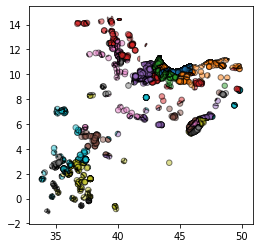

In [334]:
res_intersection.plot(alpha=0.5, edgecolor='k', cmap='tab10');

In [333]:
res_intersection['area_inter'] = res_intersection.geometry.area
res_intersection.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,area_m,area_d,GID_2,geometry,area_inter
0,16812,2000-06-04,None,150.0,Exact,None,16938.0,SOM00-06,None,1.0,1.960343e+09,0.156195,SOM.1.1_1,"POLYGON ((44.16238 10.33297, 44.15255 10.33089...",0.058320
1,16813,2000-06-04,None,0.0,Exact,None,16937.0,SOM00-06,None,1.0,1.960343e+09,0.156520,SOM.1.1_1,"POLYGON ((44.02435 10.54217, 44.02248 10.52045...",0.052407
2,17712,2000-09-01,None,50.0,Exact,None,20889.0,SOM00-12,None,1.0,1.960343e+09,0.155882,SOM.1.1_1,"POLYGON ((43.98432 10.17585, 43.98796 10.18841...",0.013099
3,17869,2000-08-03,None,150.0,Exact,None,19678.0,SOM00-09,2 PER 500M FT,1.0,1.960343e+09,0.156853,SOM.1.1_1,"POLYGON ((43.57452 10.32597, 43.57271 10.30422...",0.044261
4,18178,2001-03-24,None,120.0,Exact,None,22926.0,SOM01-03,None,1.0,1.960343e+09,0.156372,SOM.1.1_1,"POLYGON ((44.02414 10.25904, 44.02230 10.23733...",0.103445


In [337]:
res_intersection['measureID'] = 5
res_intersection['factID'] = 'LOC_'
res_intersection['factID'] = res_intersection['factID'] + res_intersection['OBJECTID'].astype(str)
res_intersection['dateID'] = res_intersection['STARTDATE']
res_intersection['locationID'] = res_intersection['GID_2']
res_intersection['value'] = res_intersection['area_inter']
res_intersection['date'] = res_intersection['STARTDATE']

res_intersection.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,...,area_d,GID_2,geometry,area_inter,measureID,factID,dateID,locationID,value,date
0,16812,2000-06-04,None,150.0,Exact,None,16938.0,SOM00-06,None,1.0,...,0.156195,SOM.1.1_1,"POLYGON ((44.16238 10.33297, 44.15255 10.33089...",0.058320,5,LOC_16812,2000-06-04,SOM.1.1_1,0.058320,2000-06-04
1,16813,2000-06-04,None,0.0,Exact,None,16937.0,SOM00-06,None,1.0,...,0.156520,SOM.1.1_1,"POLYGON ((44.02435 10.54217, 44.02248 10.52045...",0.052407,5,LOC_16813,2000-06-04,SOM.1.1_1,0.052407,2000-06-04
2,17712,2000-09-01,None,50.0,Exact,None,20889.0,SOM00-12,None,1.0,...,0.155882,SOM.1.1_1,"POLYGON ((43.98432 10.17585, 43.98796 10.18841...",0.013099,5,LOC_17712,2000-09-01,SOM.1.1_1,0.013099,2000-09-01
3,17869,2000-08-03,None,150.0,Exact,None,19678.0,SOM00-09,2 PER 500M FT,1.0,...,0.156853,SOM.1.1_1,"POLYGON ((43.57452 10.32597, 43.57271 10.30422...",0.044261,5,LOC_17869,2000-08-03,SOM.1.1_1,0.044261,2000-08-03
4,18178,2001-03-24,None,120.0,Exact,None,22926.0,SOM01-03,None,1.0,...,0.156372,SOM.1.1_1,"POLYGON ((44.02414 10.25904, 44.02230 10.23733...",0.103445,5,LOC_18178,2001-03-24,SOM.1.1_1,0.103445,2001-03-24


In [338]:
res_intersection = res_intersection[['factID', 'measureID', 'date', 'locationID', 'value']]
res_intersection.head()

,factID,measureID,date,locationID,value
0,LOC_16812,5,2000-06-04,SOM.1.1_1,0.058320
1,LOC_16813,5,2000-06-04,SOM.1.1_1,0.052407
2,LOC_17712,5,2000-09-01,SOM.1.1_1,0.013099
3,LOC_17869,5,2000-08-03,SOM.1.1_1,0.044261
4,LOC_18178,5,2001-03-24,SOM.1.1_1,0.103445


In [340]:
res_intersection = res_intersection.merge(dates, on='date', how='outer')
res_intersection = res_intersection[['factID', 'measureID', 'dateID', 'locationID', 'value']]
res_intersection.head()

,factID,measureID,dateID,locationID,value
0,LOC_16812,5.0,20000406,SOM.1.1_1,0.058320
1,LOC_16813,5.0,20000406,SOM.1.1_1,0.052407
2,LOC_16812,5.0,20000406,SOM.18.1_1,0.008023
3,LOC_16812,5.0,20000406,SOM.1.3_1,0.016704
4,LOC_16813,5.0,20000406,SOM.1.3_1,0.101372


In [341]:
# Export to parquet
res_intersection.to_parquet('Area_impact_locust_fact_20200625.parquet',
              compression='uncompressed', index = False)

In [342]:
# Export to csv
res_intersection.to_csv('Area_impact_locust_fact_20200625.csv', sep='|', encoding='utf-8', index = False)

In [316]:
intersection_gdf.head(100)

0        None
16689    None
16690    None
16691    None
16692    None
         ... 
16783    None
16784    None
16785    None
16786    None
16787    None
Length: 100, dtype: geometry

In [ ]:
gdf_districts['geometry'][0].intersection(box)

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\contextily\tile.py:629: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


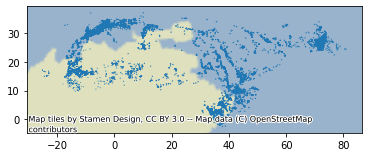

In [149]:
import matplotlib.pyplot as plt
import contextily

ax = cpr_gdf['geometry'].plot()
contextily.add_basemap(ax)
plt.show()

### Join

In [274]:
gdf_districts.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.1_1,805,None,None,Constituency,Constituency,162,None,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.2_1,Baringo Central,None,None,Constituency,Constituency,159,None,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ..."
2,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.3_1,Baringo North,None,None,Constituency,Constituency,158,None,"POLYGON ((35.81394 0.60442, 35.81377 0.60363, ..."
3,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.4_1,Baringo South,None,None,Constituency,Constituency,160,None,"POLYGON ((36.25757 0.38328, 36.25766 0.38242, ..."
4,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.5_1,Eldama Ravine,None,None,Constituency,Constituency,162,None,"POLYGON ((35.84734 -0.07654, 35.84637 -0.07804..."


In [286]:
# Join locust points & countries 
joined = gpd.sjoin(locust_gdf_filtered, 
                         gdf_districts[['GID_0', 'GID_1', 'GID_2', 'NAME_0', 'NAME_1', 'NAME_2', 'geometry']], 
                         op = "within")

In [287]:
joined.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,geometry,index_right,GID_0,GID_1,GID_2,NAME_0,NAME_1,NAME_2
16811,16812,2000-06-04,None,150.0,Exact,None,16938.0,SOM00-06,None,1.0,POINT Z (44.11667 10.55000 0.00000),380,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki
18177,18178,2001-03-24,None,120.0,Exact,None,22926.0,SOM01-03,None,1.0,POINT Z (43.80000 10.26667 0.00000),380,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki
25473,25474,2004-02-17,Barariso,100.0,Exact,None,37023.0,BIGELOCUST_20040225_,Upper part of the wa,1.0,POINT Z (44.18139 10.44139 0.00000),380,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki
25474,25475,2004-02-17,Abdi Guedi,120.0,Exact,None,37024.0,BIGELOCUST_20040225_,None,1.0,POINT Z (44.04583 10.52500 0.00000),380,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki
28143,28144,2004-03-18,None,0.0,Approximate,None,40819.0,SOM04-04,None,1.0,POINT Z (44.08500 10.26361 0.00000),380,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki


In [288]:
joined['measureID'] = 5
joined['factID'] = 'LOC_'
joined['factID'] = joined['factID'] + joined['OBJECTID'].astype(str)
joined['dateID'] = joined['STARTDATE']
joined['locationID'] = joined['GID_2']
#joined['locationID'] = joined['locationID'].fillna(joined['GID_2'])

In [289]:
joined.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,...,GID_0,GID_1,GID_2,NAME_0,NAME_1,NAME_2,measureID,factID,dateID,locationID
16811,16812,2000-06-04,None,150.0,Exact,None,16938.0,SOM00-06,None,1.0,...,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_16812,2000-06-04,SOM.1.1_1
18177,18178,2001-03-24,None,120.0,Exact,None,22926.0,SOM01-03,None,1.0,...,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_18178,2001-03-24,SOM.1.1_1
25473,25474,2004-02-17,Barariso,100.0,Exact,None,37023.0,BIGELOCUST_20040225_,Upper part of the wa,1.0,...,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_25474,2004-02-17,SOM.1.1_1
25474,25475,2004-02-17,Abdi Guedi,120.0,Exact,None,37024.0,BIGELOCUST_20040225_,None,1.0,...,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_25475,2004-02-17,SOM.1.1_1
28143,28144,2004-03-18,None,0.0,Approximate,None,40819.0,SOM04-04,None,1.0,...,SOM,SOM.1_1,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_28144,2004-03-18,SOM.1.1_1


In [290]:
cpr_gdf = joined.to_crs({'init': 'epsg:32636'})  
buffer_length_in_meters = (25 * 1000)
cpr_gdf['geometry'] = cpr_gdf.geometry.buffer(buffer_length_in_meters)
cpr_gdf['area_m'] = cpr_gdf.geometry.area

# Change again system to calculate in degrees
cpr_gdf= cpr_gdf.to_crs({'init': 'epsg:4326'})  
cpr_gdf['area_d'] = cpr_gdf.geometry.area
cpr_gdf.head()

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,...,GID_2,NAME_0,NAME_1,NAME_2,measureID,factID,dateID,locationID,area_m,area_d
16811,16812,2000-06-04,None,150.0,Exact,None,16938.0,SOM00-06,None,1.0,...,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_16812,2000-06-04,SOM.1.1_1,1.960343e+09,0.156195
18177,18178,2001-03-24,None,120.0,Exact,None,22926.0,SOM01-03,None,1.0,...,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_18178,2001-03-24,SOM.1.1_1,1.960343e+09,0.156372
25473,25474,2004-02-17,Barariso,100.0,Exact,None,37023.0,BIGELOCUST_20040225_,Upper part of the wa,1.0,...,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_25474,2004-02-17,SOM.1.1_1,1.960343e+09,0.156070
25474,25475,2004-02-17,Abdi Guedi,120.0,Exact,None,37024.0,BIGELOCUST_20040225_,None,1.0,...,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_25475,2004-02-17,SOM.1.1_1,1.960343e+09,0.156255
28143,28144,2004-03-18,None,0.0,Approximate,None,40819.0,SOM04-04,None,1.0,...,SOM.1.1_1,Somalia,Awdal,Baki,5,LOC_28144,2004-03-18,SOM.1.1_1,1.960343e+09,0.156077


In [291]:
cpr_gdf['value'] = cpr_gdf['area_d']
cpr_gdf['date'] = cpr_gdf['STARTDATE']

cpr_gdf = cpr_gdf[['factID', 'measureID', 'date', 'locationID', 'value']]

cpr_gdf.head()

,factID,measureID,date,locationID,value
16811,LOC_16812,5,2000-06-04,SOM.1.1_1,0.156195
18177,LOC_18178,5,2001-03-24,SOM.1.1_1,0.156372
25473,LOC_25474,5,2004-02-17,SOM.1.1_1,0.156070
25474,LOC_25475,5,2004-02-17,SOM.1.1_1,0.156255
28143,LOC_28144,5,2004-03-18,SOM.1.1_1,0.156077


In [339]:
dates = pd.read_csv("git/Locust-Covid19/my_package/data/input/date_23_06-2020.csv")
dates['date'] = pd.to_datetime(dates['date'])
dates.head()

,dateID,date
0,20000101,2000-01-01
1,20000102,2000-02-01
2,20000103,2000-03-01
3,20000104,2000-04-01
4,20000105,2000-05-01


In [293]:
cpr_gdf = cpr_gdf.merge(dates, on='date', how='outer')
cpr_gdf = cpr_gdf[['factID', 'measureID', 'dateID', 'locationID', 'value']]
cpr_gdf.head()

,factID,measureID,dateID,locationID,value
0,LOC_16812,5.0,20000406,SOM.1.1_1,0.156195
1,LOC_16813,5.0,20000406,SOM.1.3_1,0.156520
2,LOC_18178,5.0,20010324,SOM.1.1_1,0.156372
3,LOC_25474,5.0,20040217,SOM.1.1_1,0.156070
4,LOC_25475,5.0,20040217,SOM.1.1_1,0.156255


In [294]:
# Export to parquet
cpr_gdf.to_parquet('Area_impact_locust_fact_20200624.parquet',
              compression='uncompressed', index = False)

In [295]:
# Export to csv
cpr_gdf.to_csv('Area_impact_locust_fact_20200624.csv', sep='|', encoding='utf-8', index = False)

In [62]:
print(locust_gdf_filtered.crs)

{'init': 'epsg:4326'}


In [52]:
print(countries.crs)

None


In [53]:
countries.crs = {"init": "epsg:4326"}

In [17]:
countries.head()

,GID_0,NAME_0,geometry
0,KEN,Kenya,"MULTIPOLYGON (((39.37625 -4.71569, 39.37625 -4..."
1,ETH,Ethiopia,"POLYGON ((38.75982 3.55447, 38.74260 3.55950, ..."
2,SOM,Somalia,"MULTIPOLYGON (((41.61375 -1.60792, 41.61375 -1..."
3,UGA,Uganda,"POLYGON ((31.78514 -0.99680, 31.78462 -0.99680..."


In [42]:
#Filter areas with locust
mask = locust_gdf_filtered['geometry'].within(countries['geometry'])

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(locust_gdf[mask])


0        False
1        False
2        False
3        False
11881    False
dtype: bool
Empty GeoDataFrame
Columns: [OBJECTID, STARTDATE, TmSTARTDAT, FINISHDATE, TmFINISHDA, EXACTDATE, PARTMONTH, LOCNAME, AREAHA, LOCRELIAB, COUNTRYID, LOCUSTID, REPORTID, ACOMMENT, LOCPRESENT, SPECIESQRY, CONFIRMATN, BREEDING, REPRELIAB, SHPMINDSQM, SHPMAXDSQM, SHPMINDSIT, SHPMAXDSIT, SHPDENISOL, SHPDENSCAT, SHPDENGRP, SHPDENUNK, SHPSC, SHPSCCAT, SHPMATEGG, SHPMATHAT, SHPMATINS1, SHPMATINS2, SHPMATINS3, SHPMATINS4, SHPMATINS5, SHPMATINS6, SHPMATFLED, SHPMATUNK, SHPCOLGN, SHPCOLGNYL, SHPCOLGNBK, SHPCOLYLBK, SHPCOLBK, SHPAPPSOL, SHPAPPTRAN, SHPAPPGREG, SHPAPPUNK, GHPMINDSQM, GHPMAXDSQM, GHPMINDSIT, GHPMAXDSIT, GHPDENLOW, GHPDENMED, GHPDENHI, GHPDENUNK, GHPSC, GHPSCCAT, GHPMATEGG, GHPMATHAT, GHPMATINS1, GHPMATINS2, GHPMATINS3, GHPMATINS4, GHPMATINS5, GHPMATINS6, GHPMATFLED, GHPMATUNK, GHPCOLGN, GHPCOLYLBK, GHPCOLBK, GHPMINAHA, GHPMAXAHA, GHPARVSML, GHPARSML, GHPARMED, GHPARLGE, GHPARVLGE, GHPARUNK, SADMINDH

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\geodataframe.py:557: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [58]:
locust_gdf_filtered[locust_gdf_filtered['geometry'].within(shp0_Ethiopia['geometry'])]

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\geodataframe.py:557: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,OBJECTID,STARTDATE,geometry


In [64]:
locust_Somalia = locust_gdf_filtered[locust_gdf['geometry'].within(shp1_Somalia['geometry'])]
print(locust_Somalia.head())

Empty GeoDataFrame
Columns: [OBJECTID, STARTDATE, geometry]
Index: []


C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\geodataframe.py:557: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [65]:
list_columns = locust_gdf.columns

In [77]:
print(list_columns[70:80])

Index(['GHPCOLBK', 'GHPMINAHA', 'GHPMAXAHA', 'GHPARVSML', 'GHPARSML',
       'GHPARMED', 'GHPARLGE', 'GHPARVLGE', 'GHPARUNK', 'SADMINDHA'],
      dtype='object')


In [92]:
print(date.today())

2020-06-23
